In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime
import numpy as np

In [2]:
def parser(x):
    return datetime.strptime(x,'%d-%m-%Y')

In [3]:
df=pd.read_csv('prepared_individual_data/Urti.csv',index_col=0,parse_dates=[0],date_parser=parser)

/home/manjit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [4]:
df_urti_weeklyS = df.resample('W').sum()
df_urti_weeklyM = df.resample('W').mean()

In [5]:
df_weekly=df_urti_weeklyM.diff(1)[1:]

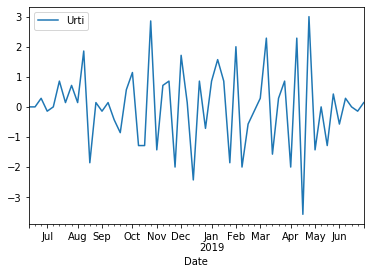

In [6]:
df_weekly.plot()

In [7]:
total=df_weekly
test_size=int(0.20*total.size)
train_size=total.size-test_size

In [8]:
train=total[:train_size]

In [9]:
test=total[train_size:]

In [10]:
from statsmodels.tsa.arima_model import ARMA

In [11]:
arma_model=ARMA(train,order=(13,2))
arma_model_fit=arma_model.fit()

In [12]:
arma_preds=arma_model_fit.forecast(steps=test_size)

In [13]:
len(arma_preds[0])

11

In [14]:
arma_preds

(array([-1.67751345,  0.48488917,  0.85254489, -0.44716803, -0.04167376,
         0.15665893, -0.47951402,  0.20956177,  0.13779046, -0.27791851,
         0.34164305]),
 array([0.82758491, 1.11660385, 1.11677683, 1.11680677, 1.16510848,
        1.17433675, 1.18447156, 1.18451606, 1.22330298, 1.22793569,
        1.22860547]),
 array([[-3.29955006, -0.05547683],
        [-1.70361417,  2.6733925 ],
        [-1.33629747,  3.04138725],
        [-2.63606908,  1.74173302],
        [-2.32524443,  2.24189691],
        [-2.1449988 ,  2.45831667],
        [-2.80103562,  1.84200757],
        [-2.11204705,  2.5311706 ],
        [-2.25983933,  2.53542024],
        [-2.68462823,  2.12879122],
        [-2.06637943,  2.74966553]]))

In [15]:
last_date=train.index[-1].date()

In [19]:
from datetime import timedelta

In [20]:
date_range=last_date
pred_dates=[]
for i in range(len(arma_preds[0])):
    date_range+=timedelta(weeks=1)
    pred_dates.append(date_range)

In [21]:
pred_dates

[datetime.date(2019, 4, 21),
 datetime.date(2019, 4, 28),
 datetime.date(2019, 5, 5),
 datetime.date(2019, 5, 12),
 datetime.date(2019, 5, 19),
 datetime.date(2019, 5, 26),
 datetime.date(2019, 6, 2),
 datetime.date(2019, 6, 9),
 datetime.date(2019, 6, 16),
 datetime.date(2019, 6, 23),
 datetime.date(2019, 6, 30)]

In [22]:
test.index

DatetimeIndex(['2019-04-21', '2019-04-28', '2019-05-05', '2019-05-12',
               '2019-05-19', '2019-05-26', '2019-06-02', '2019-06-09',
               '2019-06-16', '2019-06-23', '2019-06-30'],
              dtype='datetime64[ns]', name='Date', freq='W-SUN')

In [36]:
pred_df=pd.DataFrame(data=arma_preds[0],index=pred_dates,columns=[list(train.columns)[-1]])

In [37]:
pred_df

,Urti
2019-04-21,-1.677513
2019-04-28,0.484889
2019-05-05,0.852545
2019-05-12,-0.447168
2019-05-19,-0.041674
2019-05-26,0.156659
2019-06-02,-0.479514
2019-06-09,0.209562
2019-06-16,0.137790
2019-06-23,-0.277919


In [38]:
total_df_index=train.index.append(pred_df.index)

In [39]:
total_df_index=pd.DatetimeIndex(total_df_index)

In [40]:
list(pred_df.columns)[-1]

'Urti'

In [41]:
total_values=train[list(train.columns)[-1]].append(pred_df[list(pred_df.columns)[-1]]).values

In [42]:
df_total=pd.DataFrame(data=total_values,index=total_df_index)

In [43]:
len(df_total)

56

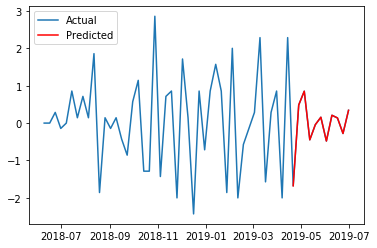

In [44]:
plt.plot(df_total,label='Actual')
plt.plot(pred_df,color='red',label='Predicted')
plt.legend()